<h1 style="text-align: center;">Numerical Algorithms (3801ICT)</h1>
<h2 style="text-align: center;">Matthew Prendergast - s5283740</h2>

<h3>Question 1</h3>

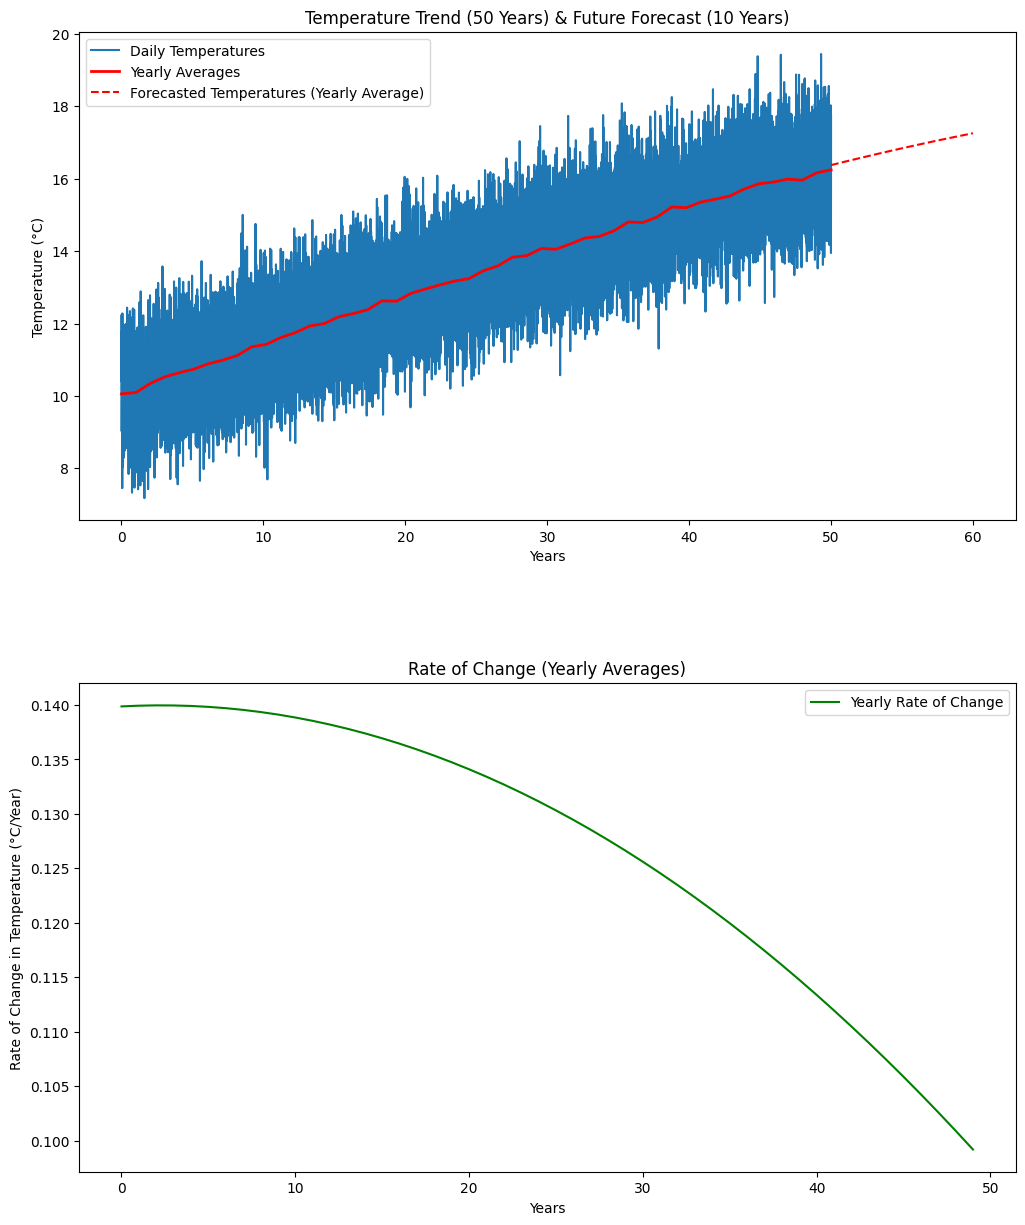

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# Constants
years = 50
days_per_year = 365

# Generate time data
time = np.linspace(0, years, years * days_per_year)

# Simulate temperature data
np.random.seed(0)
temperature = 10 + 0.02 * time                                  # Linear trend: slight increase over time
temperature += 7 * np.sin(2 * np.pi * time / 365)               # Seasonal variation
temperature += np.random.normal(0, 1, temperature.shape)        # Random daily fluctuations

# Calculating yearly averages. Compute the average temperature for each year by averaging over all days of each year.
yearly_averages = np.array([np.mean(temperature[i * days_per_year:(i + 1) * days_per_year]) for i in range(years)])

# Create a UnivariateSpline object to smooth the yearly average temperatures. Use cubic splines (k=3) and a smoothing factor of 1 (s=1).
spline = UnivariateSpline(x=np.arange(years), y=yearly_averages, s=1, k=3)

# Compute the derivative of the spline to determine the rate of change of temperature over the years.
derivative_spline = spline.derivative()

# Evaluate the derivative spline at each year to get the rate of change of the yearly average temperatures.
yearly_rate_of_change = derivative_spline(np.arange(years))

# Predict future temperatures.
future_years = np.linspace(years, years + 10, 11)               # Create an array future_years from year 50 to 60, with 11 points (each representing a year).
forecasted_temperatures = spline(future_years)                  # Use the spline to predict temperatures for the future years.

# Plot the results.
plt.figure(figsize=(12, 14))

# Plot of temperature data, yearly averages, and forecasted temperatures.
plt.subplot(2, 1, 1)
plt.plot(time, temperature, label="Daily Temperatures")
plt.plot(np.linspace(0, years, years), yearly_averages, color="red", linewidth=2, label="Yearly Averages")
plt.plot(future_years, forecasted_temperatures, 'r--', label="Forecasted Temperatures (Yearly Average)")
plt.title("Temperature Trend (50 Years) & Future Forecast (10 Years)")
plt.xlabel("Years")
plt.ylabel("Temperature (°C)")
plt.legend()

# Plot of the rate of change of yearly averages.
plt.subplot(2, 1, 2)
plt.plot(np.arange(years), yearly_rate_of_change, color="green", label="Yearly Rate of Change")
plt.title("Rate of Change (Yearly Averages)")
plt.xlabel("Years")
plt.ylabel("Rate of Change in Temperature (°C/Year)")
plt.legend()

plt.tight_layout(pad=7.0)
plt.show()

<h5>Question 2</h5>

Total Pollution Exposure: 14535.954906023784


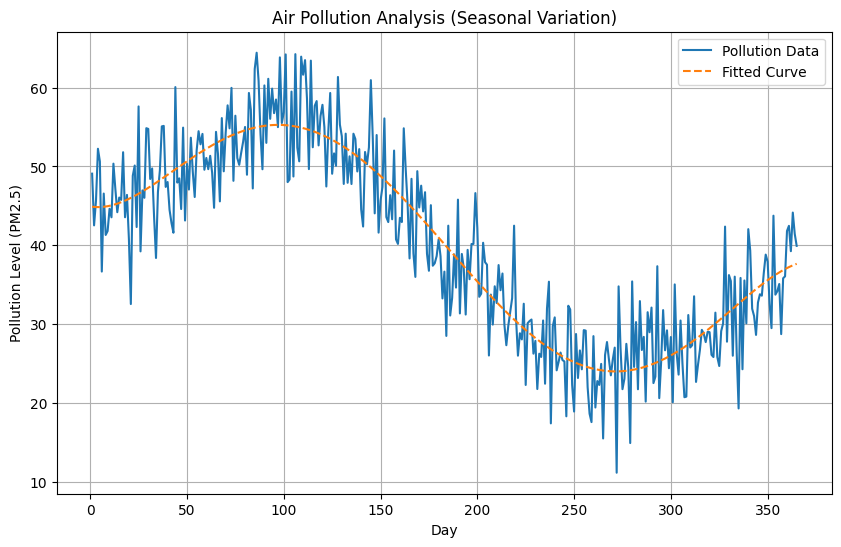

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Constants
days_per_year = 365

# Generate time data (days)
time = np.arange(1, days_per_year + 1)

# Simulate PM2.5 data with seasonal variation and random noise
base_pollution_level = 40                                               # Average pollution level
seasonal_amplitude = 15                                                 # Amplitude of seasonal variation
noise_level = 5                                                         # Noise level
np.random.seed(0)                                                       # For reproducibility

pollution_data = (base_pollution_level
                    + seasonal_amplitude * np.sin(2 * np.pi * time / days_per_year)
                    + np.random.normal(0, noise_level, days_per_year))

# Fit a curve to the pollution data.
fitted_curve = Polynomial.fit(time, pollution_data, 5)                  # Using polynomial regression given the headers provided.

# Integrate the fitted function over time using the trapezoidal rule
total_exposure = np.trapz(fitted_curve(time), time)                     # Integrate using trapezoidal rule

# Print the total exposure level.
print("Total Pollution Exposure:", total_exposure)

# Plot the pollution data and the fitted curve.
plt.figure(figsize=(10, 6))
plt.plot(time, pollution_data, label='Pollution Data')
plt.plot(time, fitted_curve(time), label='Fitted Curve', linestyle='--')
plt.xlabel('Day')
plt.ylabel('Pollution Level (PM2.5)')
plt.title('Air Pollution Analysis (Seasonal Variation)')
plt.legend()
plt.grid(True)
plt.show()

<h5>Question 3</h5>

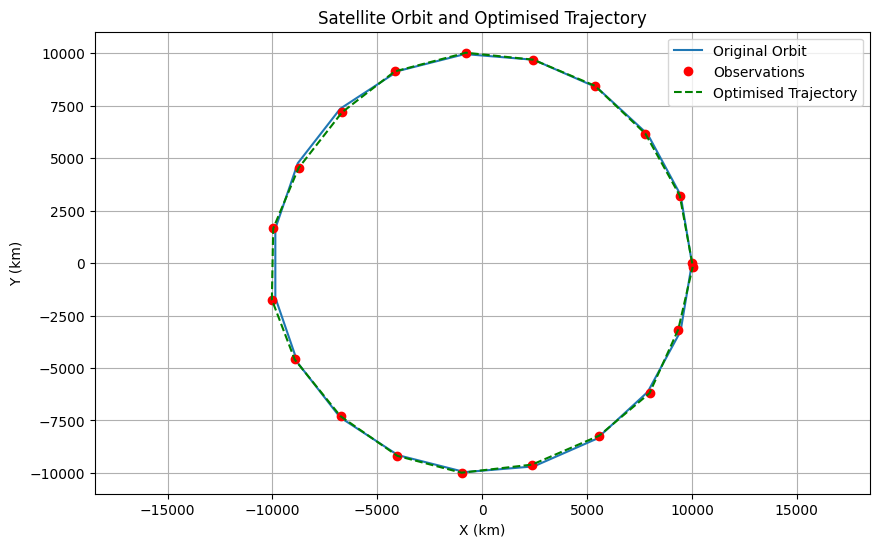

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.optimize import minimize

# Constants
num_points = 20                                                                 # number of observation points
orbit_period = 24                                                               # period of the orbit in hours

# Time stamps
time_stamps = np.linspace(0, orbit_period, num_points)

# Generate a circular orbit for simplicity
radius = 10000                                                                  # radius of the orbit in km
angles = 2 * np.pi * time_stamps / orbit_period
positions = np.vstack((radius * np.cos(angles), radius * np.sin(angles))).T

# Add some noise to simulate real observations
noise = np.random.normal(0, 100, positions.shape)                               # noise in km
observations = positions + noise

# Interpolate the observations to estimate the satellite's position at times where direct observations aren't available
interp_func = CubicSpline(time_stamps, observations, axis=0)

# Define the function to calculate hypothetical fuel usage.
def fuel_usage(adjusted_points):
    """
    Calculates the hypothetical fuel usage based on trajectory adjustments.

    Parameters:
        adjusted_points (array_like): Adjusted points representing the satellite's trajectory at certain time points.

    Returns:
        float: Total hypothetical fuel usage required for the adjusted trajectory.
    """
    # Calculate the trajectory based on adjusted points.
    adjusted_positions = interp_func(adjusted_points)
    # Calculate hypothetical fuel usage based on trajectory adjustments.
    fuel = np.sum(np.abs(adjusted_positions - observations))
    return fuel

# Initial guess for optimisation - copy observations to use as the initial guesses.
initial_guess = time_stamps.copy()

# Optimise trajectory to minimise fuel usage. Minimise the fuel_usage function with respect to the adjusted points, using the Quasi-Newton optimisation method.
result = minimize(fuel_usage, initial_guess, method='BFGS')

# Get optimised points. Extract the optimised points from the result. Then, calculate the optimised positions of the satellite using interp_func.
optimised_points = result.x
optimised_positions = interp_func(optimised_points)

# Plot the original orbit, observations, and optimised trajectory.
plt.figure(figsize=(10, 6))
plt.plot(positions[:, 0], positions[:, 1], label='Original Orbit')
plt.plot(observations[:, 0], observations[:, 1], 'ro', label='Observations')
plt.plot(optimised_positions[:, 0], optimised_positions[:, 1], 'g--', label='Optimised Trajectory')
plt.xlabel('X (km)')
plt.ylabel('Y (km)')
plt.title('Satellite Orbit and Optimised Trajectory')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

<h5>Question 4</h5>

Estimated GDP Growth Over 30 Years: $61.836510538779294 billion USD


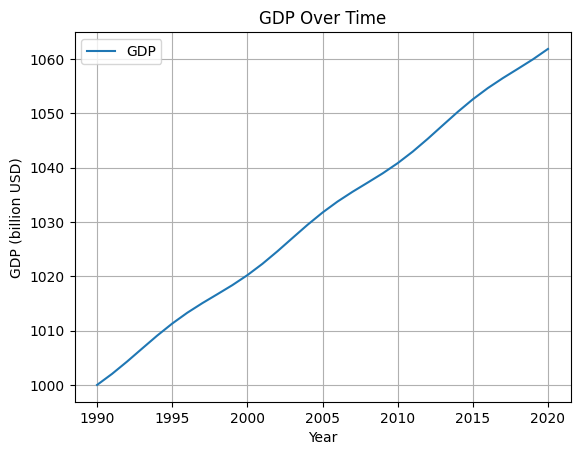

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 0.02                                                                # Proportionality constant
years = np.linspace(1990, 2020, 31)                                     # 30 years from 1990 to 2020
R = 0.1 + 0.02 * np.sin(0.2 * np.pi * (years - 1990))                   # R&D investment fluctuates

# Initial condition and step size.
G0 = 1000                                                               # Initial GDP in billion USD
h = 1                                                                   # Initial GDP in billion USD

# Define the function for GDP change over time.
def gdp_change(t, G):
    """
    Calculate the change in GDP over time using the given equation.

    Args:
    t (float): Time.
    G (float): Current GDP value.

    Returns:
    float: Change in GDP over time.
    """
    return k * G * R[int(t) - 1990]

# Define the function for Runge-Kutta 4th order method.
def runge_kutta_4(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k1/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6.0

# Calculate how the GDP changes over time. 
G = np.zeros_like(years)                                                # Create an array to store GDP values over time.
G[0] = G0                                                               # Set the initial GDP value.
for i in range(1, len(years)):                                          
    G[i] = runge_kutta_4(gdp_change, years[i-1], G[i-1], h)             # Calculate GDP for each year using the function above.

# Calculate the estimated GDP growth by deducting the initial GDP from the last element in the array.
total_gdp_growth = G[-1] - G0
print(f"Estimated GDP Growth Over 30 Years: ${total_gdp_growth} billion USD")

# Plot the GDP over time.
plt.plot(years, G, label='GDP')
plt.xlabel('Year')
plt.ylabel('GDP (billion USD)')
plt.title('GDP Over Time')
plt.legend()
plt.grid(True)
plt.show()